<a href="https://colab.research.google.com/github/ckongara/aer850_project2/blob/main/AER850_Project2_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Mount Google Drive to access files
drive.mount('/content/drive')

# Assuming your model is saved as 'my_model.h5' in the root directory of your Google Drive
saved_model_path = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Proj2_NN_Model.keras'  # Update the path if needed

# Load the saved model
loaded_model = load_model(saved_model_path)
model=loaded_model


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 118ms/step


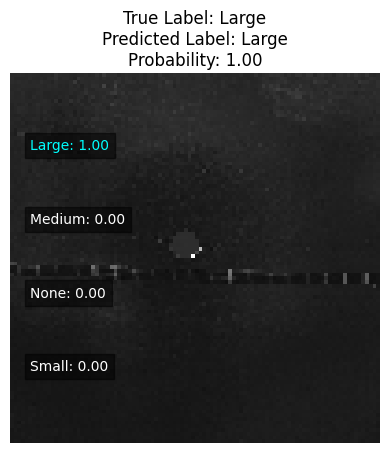

In [7]:
# Load an image for prediction
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Project_2_Data/Test/Large/Crack__20180419_13_29_14,846.bmp'
img = image.load_img(image_path, target_size=(100, 100))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize image data

# Get model predictions
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)
predicted_prob = np.max(predictions)

# Create a dictionary of class names
class_names = {
    0: "Large",
    1: "Medium",
    2: "None",
    3: "Small"
}

# Change this variable depending on which test image is used (i.e. Large, Medium, None, Small)
true_label = "Large"

# Map predicted class index to label using class_names dictionary
predicted_label = class_names[predicted_class]  # Assuming class_names is available

# Prepare the output with true and predicted labels
output = f"True Label: {true_label}\nPredicted Label: {predicted_label}\nProbability: {predicted_prob:.2f}"

# Display the image with overlaid text
plt.imshow(img)
plt.title(output)
plt.axis('off')

# Show the probabilities overlaid on the image
for i, prob in enumerate(predictions[0]):
    label = class_names[i]
    text_color = 'cyan' if label == predicted_label else 'white'  # Color for labels
    plt.text(5, 20 + 20 * i, f"{label}: {prob:.2f}", color=text_color, fontsize=10, bbox=dict(facecolor='black', alpha=0.5))

plt.show()